# Starter

In this code we convert the output of AlphaFold from mmCIF (.CIF) to PDB (.pdb) by using biopython library.

In [2]:
from Bio.PDB import MMCIFParser, DSSP

# Load mmCIF file
parser = MMCIFParser()
structure = parser.get_structure("model", "fold_cb513_0/fold_cb513_0_model_0.cif")

# Run DSSP
dssp = DSSP(structure[0], "fold_cb513_0/fold_cb513_0_model_0.cif", dssp='mkdssp')

In [3]:
# Print all DSSP output
for key in dssp.keys():
    residue = dssp[key]
    print(residue)

(1, 'V', '-', 1.0, 360.0, 121.7, 0, 0.0, 2, -0.1, 0, 0.0, 0, 0.0)
(2, 'P', '-', 0.5441176470588235, -68.7, 146.5, 0, 0.0, 2, -0.0, 0, 0.0, 0, 0.0)
(3, 'S', '-', 0.46153846153846156, -72.8, 163.8, 1, -0.1, 4, -2.3, -2, -0.1, 5, -0.2)
(4, 'L', 'H', 0.6402439024390244, -60.8, -35.5, 1, -0.2, 4, -2.6, 2, -0.2, 33, -0.2)
(5, 'A', 'H', 0.2169811320754717, -62.4, -42.6, 2, -0.2, 4, -2.3, 1, -0.2, 32, -0.3)
(6, 'T', 'H', 0.4225352112676056, -63.8, -45.2, 2, -0.2, 4, -2.5, 1, -0.2, -2, -0.2)
(7, 'I', 'H', 0.378698224852071, -62.0, -42.8, -4, -2.3, 4, -2.6, 1, -0.2, -2, -0.2)
(8, 'S', 'H', 0.12307692307692308, -60.4, -44.1, -4, -2.6, 4, -1.5, 1, -0.2, -1, -0.2)
(9, 'L', 'H', 0.21341463414634146, -63.7, -44.3, -4, -2.3, 4, -0.6, 2, -0.2, -2, -0.2)
(10, 'E', 'H', 0.6237113402061856, -60.7, -43.6, -4, -2.5, 3, -0.9, 1, -0.2, 4, -0.4)
(11, 'N', 'H', 0.8152866242038217, -66.8, -28.0, -4, -2.6, 4, -0.2, 1, -0.2, -1, -0.2)
(12, 'S', 'H', 0.2230769230769231, -101.1, 3.7, -4, -1.5, 4, -3.0, -5, -0.2, 5, 

In [8]:
# Combine all the residue into one string called residue
# Combine all the predicted secondary structure one string called ss
# Return the residue and ss

residue = ""
ss = ""

for key in dssp.keys():
    residue += dssp[key][1]
    ss += dssp[key][2]

print(residue)
print(ss)

VPSLATISLENSWSGLSKQIQLAQGNNGIFRTPIVLVDNKGNRVQITNVTSKVVTSNIQLLLNTRNI
---HHHHHHHHHHHHHHHHHHHHTTTTTEEEEEEEEE-TTS-EEEEEETTSHHHHHHHHHHHHHHH-


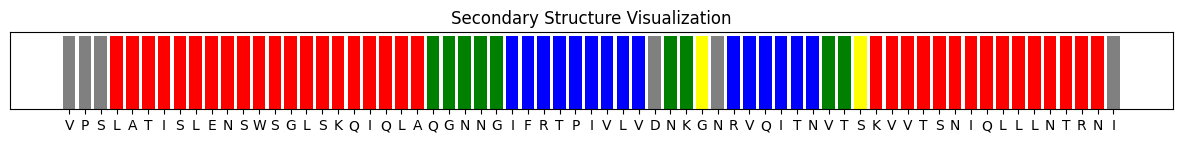

In [16]:
import matplotlib.pyplot as plt

# Your sequence and secondary structure
sequence = "VPSLATISLENSWSGLSKQIQLAQGNNGIFRTPIVLVDNKGNRVQITNVTSKVVTSNIQLLLNTRNI"
secondary_structure = "---HHHHHHHHHHHHHHHHHHHHTTTTTEEEEEEEEE-TTS-EEEEEETTSHHHHHHHHHHHHHHH-"

# Define colors for secondary structure elements using 8-state DSSP
colors = {'H': 'red', 'B': 'blue', 'E': 'blue', 'G': 'purple', 'I': 'orange', 'T': 'green', 'S': 'yellow', '-': 'gray'}

# Create a list of colors corresponding to the secondary structure
color_list = [colors[ss] for ss in secondary_structure]

# Plot
fig, ax = plt.subplots(figsize=(15, 1))
ax.bar(range(len(sequence)), [1]*len(sequence), color=color_list)
ax.set_xticks(range(len(sequence)))
ax.set_xticklabels(sequence, rotation=0, fontsize=10)
ax.set_yticks([])
ax.set_title("Secondary Structure Visualization")

plt.show()